# Frame Dragging in Kerr Spacetime

In [1]:
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from einsteinpy.metric import Kerr
from einsteinpy.coordinates import BoyerLindquistDifferential
from einsteinpy.bodies import Body
from einsteinpy.geodesic import Geodesic

In [2]:
a = 0.3 * u.m
Attractor = Body(name="BH", mass=1.989e30 * u.kg, a=a)
init_conditions = BoyerLindquistDifferential(49.95e5 * u.km, np.pi / 2 * u.rad, 
                                             np.pi * u.rad, 0 * u.km / u.s, 
                                             0 * u.rad / u.s, 0 * u.rad / u.s,
                                             a)
Particle = Body(differential=init_conditions, parent=Attractor)

In [3]:
geodesic = Geodesic(body=Particle, time=0 * u.s, end_lambda=33932.90, 
                    step_size=1.2, metric=Kerr)
ans = geodesic.trajectory

In [4]:
x, y = ans[:,1], ans[:,2]

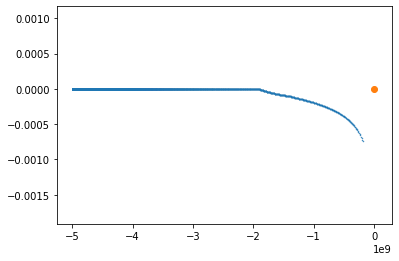

In [5]:
%matplotlib inline

plt.scatter(x,y, s=0.2)
plt.scatter(0,0, )
plt.show()